## PROJETO ETL E ANÁLISE DE DADOS COM PYTHON:

Objetivo: neste relatório iremos utilizar um dataset de reclamações registradas por cidadãos mantido pela prefeitura de curitiba para tratar os dados e posteriormente fazer uma análise exploratória dos dados.

Os dados podem ser acessados via [Portal de Dados Abertos da Prefeitura de Curitiba](https://www.curitiba.pr.gov.br/DADOSABERTOS/).

In [273]:
import pandas as pd

Importando os dados

In [274]:
dados = pd.read_csv('C:\\Users\\Adauto\\OneDrive\\Área de Trabalho\\Ciencia de Dados\\icev\\modulo 5 Analise Exploratoria de Dados\\base de dados\\2017-02-01_156_-_Base_de_Dados_sample.csv', delimiter = ';', encoding = 'latin-1')

Visualizando o dataset:


Cada linha aqui representa uma reclamação feita por um cidadaão junto a prefeitura de curitiba por algum assunto.


Os dados trazem informações sobre o solicitante da reclamação e sobre o conteúdo dela em sim.

In [275]:
dados.head()

,SOLICITACAO,TIPO,ORGAO,DATA,HORARIO,ASSUNTO,SUBDIVISAO,DESCRICAO,LOGRADOURO_ASS,BAIRRO_ASS,REGIONAL_ASS,MEIO_RESPOSTA,OBSERVACAO,SEXO,BAIRRO_CIDADAO,REGIONAL_CIDADAO,DATA_NASC,TIPO_CIDADAO,ORGAO_RESP,RESPOSTA_FINAL
0,6669771,SOLICITAÇÃO,INSTITUTO DAS CIDADES INTELIGENTES,09/11/2016,21:02:44,ABORDAGEM SOCIAL DE RUA - ADULTO,PESSOAS/FAMÍLIAS EM DESABRIGO NA RUA,ABORDAGEM SOCIAL DE RUA - ADULTO - PESSOAS/FAM...,"ANDRE DE BARROS, 0",CENTRO,Unidade Regional Matriz,NENHUM,NÃO SOUBE INFORMAR NUMERAÇÃO PREDIAL,M,NaN,NaN,NaN,CIDADÃO,FUNDAÇÃO DE AÇÃO SOCIAL,Abordagem realizada. Pessoa foi orientada quan...
1,6718351,SOLICITAÇÃO,INSTITUTO DAS CIDADES INTELIGENTES,27/12/2016,00:40:04,ABORDAGEM SOCIAL DE RUA - ADULTO,PERDIDA/DESORIENTADA,ABORDAGEM SOCIAL DE RUA - ADULTO - PERDIDA/DES...,"NILO CAIRO, 0",CENTRO,Unidade Regional Matriz,NENHUM,"NÃO SOUBE INFORMAR NUMERAÇÃO PREDIAL, RELATA E...",M,NaN,NaN,NaN,CIDADÃO,FUNDAÇÃO DE AÇÃO SOCIAL,"EM ABORDAGEM REALIZADA, NÃO FOI ENCONTRADA A P..."
2,6702371,SOLICITAÇÃO,INSTITUTO DAS CIDADES INTELIGENTES,07/12/2016,14:09:42,ABORDAGEM SOCIAL DE RUA - CRIANÇA,ALCOOLIZADAS/DROGADAS,ABORDAGEM SOCIAL DE RUA - CRIANÇA - ALCOOLIZAD...,"VISCONDE DE NACAR, 1210",CENTRO,Unidade Regional Matriz,NENHUM,NaN,F,NaN,NaN,NaN,CIDADÃO,FUNDAÇÃO DE AÇÃO SOCIAL,"- EM ABORDAGEM REALIZADA, NÃO FOI ENCONTRADA A..."
3,6718692,SOLICITAÇÃO,INSTITUTO DAS CIDADES INTELIGENTES,27/12/2016,13:28:27,ABORDAGEM SOCIAL DE RUA - ADULTO,PESSOAS/FAMÍLIAS EM DESABRIGO NA RUA,ABORDAGEM SOCIAL DE RUA - ADULTO - PESSOAS/FAM...,"MARECHAL DEODORO, 0",CENTRO,Unidade Regional Matriz,NENHUM,NaN,M,NaN,NaN,NaN,CIDADÃO,FUNDAÇÃO DE AÇÃO SOCIAL,A pessoa da solicitação já foi abordada nesta ...
4,6704503,SOLICITAÇÃO,INSTITUTO DAS CIDADES INTELIGENTES,09/12/2016,01:28:16,ABORDAGEM SOCIAL DE RUA - ADULTO,DORMINDO/CAÍDAS NA RUA,ABORDAGEM SOCIAL DE RUA - ADULTO - DORMINDO/CA...,"MARECHAL DEODORO, 0",CENTRO,Unidade Regional Matriz,NENHUM,NÃO SOUBE INFORMAR NUMERAÇÃO PREDIAL.,M,NaN,NaN,04/06/1997,CIDADÃO,FUNDAÇÃO DE AÇÃO SOCIAL,A pessoa da solicitação já faz parte da rede d...


Verificando a estrutura dos dados e sua respectiva tipagem com o método `info` 

In [276]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7013 entries, 0 to 7012
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   SOLICITACAO       7013 non-null   int64 
 1   TIPO              7013 non-null   object
 2   ORGAO             7013 non-null   object
 3   DATA              7013 non-null   object
 4   HORARIO           7013 non-null   object
 5   ASSUNTO           7013 non-null   object
 6   SUBDIVISAO        7013 non-null   object
 7   DESCRICAO         7013 non-null   object
 8   LOGRADOURO_ASS    7013 non-null   object
 9   BAIRRO_ASS        7013 non-null   object
 10  REGIONAL_ASS      7011 non-null   object
 11  MEIO_RESPOSTA     7013 non-null   object
 12  OBSERVACAO        3786 non-null   object
 13  SEXO              7013 non-null   object
 14  BAIRRO_CIDADAO    6897 non-null   object
 15  REGIONAL_CIDADAO  6757 non-null   object
 16  DATA_NASC         6889 non-null   object
 17  TIPO_CIDADAO  

Estamos interessados apenas nos seguintes campos: 'DATA', 'HORARIO', 'SUBDIVISAO', 'BAIRRO_ASS', 'SEXO', 'DATA_NASC', 'RESPOSTA_FINAL' para nossa análise exploratória posterior

Logo, iremos substituir o dataset original apenas com as colunas de interesse.

In [277]:
dados = dados[['DATA', 'HORARIO', 'SUBDIVISAO', 'BAIRRO_ASS', 'SEXO', 'DATA_NASC', 'RESPOSTA_FINAL', 'ASSUNTO']]
dados.shape # verificando a estrutura do novo dataset

(7013, 8)

Qual a extensão temporal do nosso dataset?

In [278]:
periodo_inicial = dados['DATA'].min()
periodo_final = dados['DATA'].max()
print(f'Os dados vão de {periodo_inicial} até {periodo_final} ')

Os dados vão de 01/01/2017 até 31/12/2016 


# Lidando com valores ausentes

Aqui combinaremos os métodos `isna` e `any` para retornar apenas as linhas que possuam NaN em qualquer coluna

In [279]:
dados[dados.isna().any(axis = 1)]

,DATA,HORARIO,SUBDIVISAO,BAIRRO_ASS,SEXO,DATA_NASC,RESPOSTA_FINAL,ASSUNTO
0,09/11/2016,21:02:44,PESSOAS/FAMÍLIAS EM DESABRIGO NA RUA,CENTRO,M,NaN,Abordagem realizada. Pessoa foi orientada quan...,ABORDAGEM SOCIAL DE RUA - ADULTO
1,27/12/2016,00:40:04,PERDIDA/DESORIENTADA,CENTRO,M,NaN,"EM ABORDAGEM REALIZADA, NÃO FOI ENCONTRADA A P...",ABORDAGEM SOCIAL DE RUA - ADULTO
2,07/12/2016,14:09:42,ALCOOLIZADAS/DROGADAS,CENTRO,F,NaN,"- EM ABORDAGEM REALIZADA, NÃO FOI ENCONTRADA A...",ABORDAGEM SOCIAL DE RUA - CRIANÇA
3,27/12/2016,13:28:27,PESSOAS/FAMÍLIAS EM DESABRIGO NA RUA,CENTRO,M,NaN,A pessoa da solicitação já foi abordada nesta ...,ABORDAGEM SOCIAL DE RUA - ADULTO
6,17/12/2016,16:06:04,VEÍCULO ESTACIONADO - GUIA REBAIXADA,CENTRO,M,NaN,Informamos que o atendimento aos pedidos para ...,TRÂNSITO
...,...,...,...,...,...,...,...,...
6966,07/11/2016,21:40:23,NEGLIGÊNCIA,SITIO CERCADO,F,NaN,24 - SOLICITAÇÃO ATENDIDA EM DOMICÍLIO E ENCER...,ATENDIMENTO SOCIAL EM DOMICÍLIO - CRIANÇA
6967,08/12/2016,10:29:23,VIOLÊNCIA FÍSICA,CAPAO RASO,M,NaN,24 - SOLICITAÇÃO ATENDIDA EM DOMICÍLIO E ENCER...,ATENDIMENTO SOCIAL EM DOMICÍLIO - CRIANÇA
6968,10/01/2017,10:36:48,NEGLIGÊNCIA,CIDADE INDUSTRIAL,M,NaN,23 - SOLICITAÇÃO ATENDIDA EM DOMICÍLIO E ENCER...,ATENDIMENTO SOCIAL EM DOMICÍLIO - CRIANÇA
6969,05/12/2016,10:48:33,NEGLIGÊNCIA,CIDADE INDUSTRIAL,F,NaN,24 - SOLICITAÇÃO ATENDIDA EM DOMICÍLIO E ENCER...,ATENDIMENTO SOCIAL EM DOMICÍLIO - CRIANÇA


Agora excluiremos todas as linhas que contenham algum valor nulo (*NaN*) 

In [280]:
dados.dropna(inplace = True)

dados[dados.isna().any(axis = 1)] # rodamos o código novamente para verificar o resultado

,DATA,HORARIO,SUBDIVISAO,BAIRRO_ASS,SEXO,DATA_NASC,RESPOSTA_FINAL,ASSUNTO


In [281]:
# verificando o dataset após exclusao dos NaN's
dados.shape

(6886, 8)

Lidando com as strings: transformando os valores da coluna de Bairros para minúsculas com o método `str.lower()`

In [282]:
dados['BAIRRO_ASS'] = dados['BAIRRO_ASS'].str.lower()

dados['BAIRRO_ASS'].unique() # com o método unique podemos verificar o resultado, já que ele retorna os valores únicos de uma variável

array(['centro', 'sao francisco', 'reboucas', 'jardim botanico',
       'alto da rua xv', 'atuba', 'capao da imbuia', 'merces',
       'abranches', 'santa felicidade', 'santa quiteria', 'parolin',
       'lindoia', 'novo mundo', 'guaira', 'umbara', 'alto boqueirao',
       'cidade industrial', 'campo de santana', 'bigorrilho', 'batel',
       'agua verde', 'juveve', 'alto da gloria', 'bairro alto', 'portao',
       'bacacheri', 'cabral', 'campina do siqueira', 'santa candida',
       'taruma', 'centro civico', 'ahu', 'cristo rei', 'sao lourenco',
       'boa vista', 'santo inacio', 'hugo lange', 'barreirinha',
       'uberaba', 'mossungue', 'tingui', 'taboao', 'seminario',
       'pinheirinho', 'cajuru', 'capao raso', 'guabirotuba',
       'jardim das americas', 'prado velho', 'boqueirao',
       'campo comprido', 'sitio cercado', 'pilarzinho', 'fazendinha',
       'vista alegre', 'jardim social', 'caximba', 'hauer', 'vila izabel',
       'bom retiro', 'cascatinha', 'sao braz', 'cachoe

## Trantando a tipagem dos dados e criando novas colunas de interesse

Exibindo os tipos das colunas do DataFrame.

In [283]:
# Resposta:
dados.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6886 entries, 4 to 7012
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   DATA            6886 non-null   object
 1   HORARIO         6886 non-null   object
 2   SUBDIVISAO      6886 non-null   object
 3   BAIRRO_ASS      6886 non-null   object
 4   SEXO            6886 non-null   object
 5   DATA_NASC       6886 non-null   object
 6   RESPOSTA_FINAL  6886 non-null   object
 7   ASSUNTO         6886 non-null   object
dtypes: object(8)
memory usage: 484.2+ KB


Objetivos: 
- Transformar a coluna `DATA` para o tipo datetime;
- Extrair da coluna `HORARIO` apenas a hora da reclamação, criando nova coluna para tal;

In [313]:
dados['DATA'] = pd.to_datetime(dados['DATA'])

dados.info() # conferindo resultado

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6866 entries, 4 to 7012
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   DATA            6866 non-null   datetime64[ns]
 1   HORARIO         6866 non-null   object        
 2   SUBDIVISAO      6866 non-null   object        
 3   BAIRRO_ASS      6866 non-null   object        
 4   SEXO            6866 non-null   object        
 5   DATA_NASC       6866 non-null   datetime64[ns]
 6   RESPOSTA_FINAL  6866 non-null   object        
 7   ASSUNTO         6866 non-null   object        
 8   HORA            6866 non-null   int32         
 9   IDADE           6866 non-null   int32         
 10  mes             6866 non-null   int64         
dtypes: datetime64[ns](2), int32(2), int64(1), object(6)
memory usage: 590.0+ KB


In [285]:
# Extraindo apenas a hora da coluna HORARIO
dados['HORA'] = dados['HORARIO'].str.split(pat = ':').str.get(0)

dados.head() # verificando resultado

,DATA,HORARIO,SUBDIVISAO,BAIRRO_ASS,SEXO,DATA_NASC,RESPOSTA_FINAL,ASSUNTO,HORA
4,2016-09-12,01:28:16,DORMINDO/CAÍDAS NA RUA,centro,M,04/06/1997,A pessoa da solicitação já faz parte da rede d...,ABORDAGEM SOCIAL DE RUA - ADULTO,01
5,2016-12-11,02:29:24,DORMINDO/CAÍDAS NA RUA,centro,M,29/12/1971,A pessoa da solicitação já faz parte da rede d...,ABORDAGEM SOCIAL DE RUA - ADULTO,02
7,2017-11-01,12:11:12,RECURSOS MATERIAIS - MEDICAMENTOS,sao francisco,F,04/08/1957,Alendronato de sódio 70 mg e Carbonato de cálc...,CRM-AF/SMS,12
8,2016-12-14,10:19:29,RECURSOS MATERIAIS - MEDICAMENTOS,sao francisco,F,18/08/1938,ALENDRONATO DE SÓDIO 70 MG E CARBONATO DE CÁL...,CRM-AF/SMS,10
9,2016-06-12,19:01:01,DORMINDO/CAÍDAS NA RUA,centro,M,13/02/1980,"EM ABORDAGEM REALIZADA, NÃO FOI ENCONTRADA A P...",ABORDAGEM SOCIAL DE RUA - ADULTO,19


In [286]:
# Convertendo a nova coluna HORA para o tipo inteiro

dados['HORA'] = dados['HORA'].astype(int)

dados.info() # conferindo resultado

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6886 entries, 4 to 7012
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   DATA            6886 non-null   datetime64[ns]
 1   HORARIO         6886 non-null   object        
 2   SUBDIVISAO      6886 non-null   object        
 3   BAIRRO_ASS      6886 non-null   object        
 4   SEXO            6886 non-null   object        
 5   DATA_NASC       6886 non-null   object        
 6   RESPOSTA_FINAL  6886 non-null   object        
 7   ASSUNTO         6886 non-null   object        
 8   HORA            6886 non-null   int32         
dtypes: datetime64[ns](1), int32(1), object(7)
memory usage: 511.1+ KB


Agora que já tratamos a coluna de `DATA` e `HORA`, iremos criar nova coluna de `IDADE` dos solicitantes a partir da diferença entre o ano da reclamação e o ano de nascimento da pessoa


In [315]:
dados['DATA_NASC'] = pd.to_datetime(dados['DATA_NASC'])
dados['IDADE'] = dados['DATA'].dt.year.astype(int) - dados['DATA_NASC'].dt.year.astype(int)

Verificando se as colunas foram corretamente convertidas para os tipos informados

In [316]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6866 entries, 4 to 7012
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   DATA            6866 non-null   datetime64[ns]
 1   HORARIO         6866 non-null   object        
 2   SUBDIVISAO      6866 non-null   object        
 3   BAIRRO_ASS      6866 non-null   object        
 4   SEXO            6866 non-null   object        
 5   DATA_NASC       6866 non-null   datetime64[ns]
 6   RESPOSTA_FINAL  6866 non-null   object        
 7   ASSUNTO         6866 non-null   object        
 8   HORA            6866 non-null   int32         
 9   IDADE           6866 non-null   int32         
 10  mes             6866 non-null   int64         
dtypes: datetime64[ns](2), int32(2), int64(1), object(6)
memory usage: 590.0+ KB


In [289]:
# verificando a coluna criada
dados.head()

,DATA,HORARIO,SUBDIVISAO,BAIRRO_ASS,SEXO,DATA_NASC,RESPOSTA_FINAL,ASSUNTO,HORA,IDADE
4,2016-09-12,01:28:16,DORMINDO/CAÍDAS NA RUA,centro,M,1997-04-06,A pessoa da solicitação já faz parte da rede d...,ABORDAGEM SOCIAL DE RUA - ADULTO,1,19
5,2016-12-11,02:29:24,DORMINDO/CAÍDAS NA RUA,centro,M,1971-12-29,A pessoa da solicitação já faz parte da rede d...,ABORDAGEM SOCIAL DE RUA - ADULTO,2,45
7,2017-11-01,12:11:12,RECURSOS MATERIAIS - MEDICAMENTOS,sao francisco,F,1957-04-08,Alendronato de sódio 70 mg e Carbonato de cálc...,CRM-AF/SMS,12,60
8,2016-12-14,10:19:29,RECURSOS MATERIAIS - MEDICAMENTOS,sao francisco,F,1938-08-18,ALENDRONATO DE SÓDIO 70 MG E CARBONATO DE CÁL...,CRM-AF/SMS,10,78
9,2016-06-12,19:01:01,DORMINDO/CAÍDAS NA RUA,centro,M,1980-02-13,"EM ABORDAGEM REALIZADA, NÃO FOI ENCONTRADA A P...",ABORDAGEM SOCIAL DE RUA - ADULTO,19,36


Explorando os valores da coluna `IDADE`

Text(0, 0.5, ' Idade em anos')

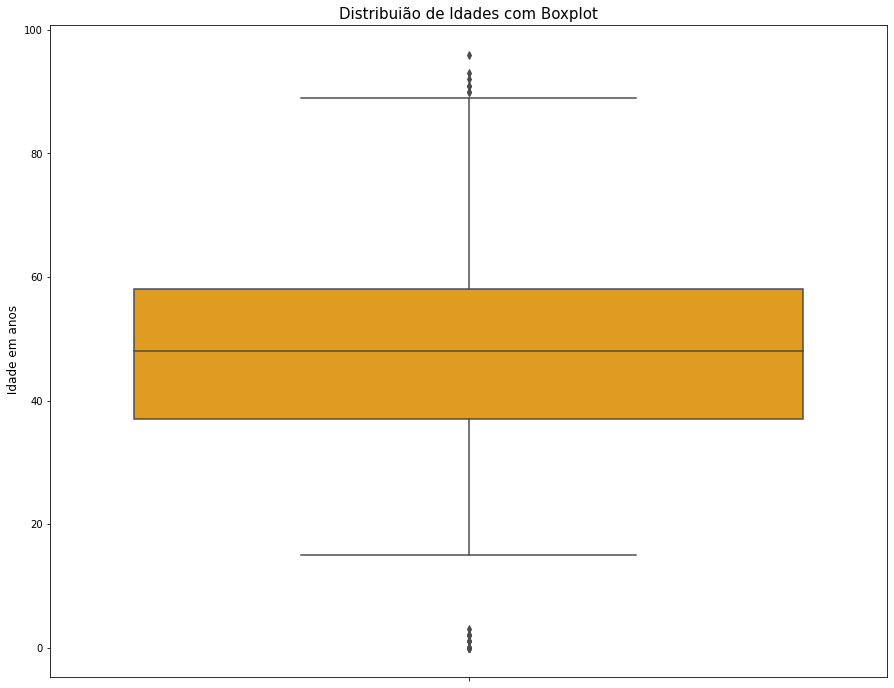

In [290]:
import seaborn as sns
import matplotlib.pyplot as plt
graf1_idade = sns.boxplot(y= 'IDADE', data = dados, color = 'orange', orient='v')
graf1_idade.figure.set_size_inches(15, 12)
plt.title('Distribuião de Idades com Boxplot', fontsize =15)
plt.ylabel(' Idade em anos', fontsize = 12)


O boxplot nos indica outliers acima do limite supeior com idades que estão próximas de 100 anos.


Entretando, os outliers proximos do limite inferior estão com idades próximas ou iguais a 0. É contraproducedente termos pessoas com estas idades realizando reclamações junto a prefeitura, e os dados merecem investigação

In [291]:
# verificando idades muito baixas
dados['IDADE'].loc[dados['IDADE'] < 18].sort_values()

1265     0
6647     0
6991     0
4268     0
3041     0
3010     0
2855     0
4272     0
6992     0
2163     0
1693     0
1694     0
6475     1
1516     1
2988     1
1622     2
6254     2
2581     2
5734     2
5758     3
6268    15
4204    16
2073    16
4676    16
6105    16
6838    16
6356    17
2367    17
4543    17
4510    17
1765    17
6224    17
4767    17
Name: IDADE, dtype: int32

Como suspeitamos, existem dados de idade que não fazem sentido prático, e iremos retirar as idades de 3, 2, 1 e 0 anos da base

In [292]:
filtro = dados['IDADE'] >= 15
dados = dados[filtro]

dados['IDADE'].loc[dados['IDADE'] < 18].sort_values() # conferindo resultado

6268    15
2073    16
4204    16
4676    16
6105    16
6838    16
1765    17
2367    17
4510    17
4543    17
4767    17
6224    17
6356    17
Name: IDADE, dtype: int32

In [293]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6866 entries, 4 to 7012
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   DATA            6866 non-null   datetime64[ns]
 1   HORARIO         6866 non-null   object        
 2   SUBDIVISAO      6866 non-null   object        
 3   BAIRRO_ASS      6866 non-null   object        
 4   SEXO            6866 non-null   object        
 5   DATA_NASC       6866 non-null   datetime64[ns]
 6   RESPOSTA_FINAL  6866 non-null   object        
 7   ASSUNTO         6866 non-null   object        
 8   HORA            6866 non-null   int32         
 9   IDADE           6866 non-null   int32         
dtypes: datetime64[ns](2), int32(2), object(6)
memory usage: 536.4+ KB


Agora iremos salvar o dataframe já tratado para usarmos os dados limpos na parte de E.D.A

In [294]:
# Resposta:
dados.to_csv('C:\\Users\Adauto\\OneDrive\\Área de Trabalho\\Ciencia de Dados\\icev\\modulo 5 Analise Exploratoria de Dados\\base de dados\\2017-02-01_156_-_Base_de_Dados_sample_limpo.csv', index=False)

## Análise Exploratória

Com os dados tratados e salvo anteriormente, iremos iniciar a fase de exploração dos dados para descoberta de informações.

In [295]:
dados_tratado = pd.read_csv('C:\\Users\\Adauto\\OneDrive\\Área de Trabalho\\Ciencia de Dados\\icev\\modulo 5 Analise Exploratoria de Dados\\base de dados\\2017-02-01_156_-_Base_de_Dados_sample_limpo.csv')

In [296]:
# Verificando algumas linhas do dataset

dados_tratado.head()

,DATA,HORARIO,SUBDIVISAO,BAIRRO_ASS,SEXO,DATA_NASC,RESPOSTA_FINAL,ASSUNTO,HORA,IDADE
0,2016-09-12,01:28:16,DORMINDO/CAÍDAS NA RUA,centro,M,1997-04-06,A pessoa da solicitação já faz parte da rede d...,ABORDAGEM SOCIAL DE RUA - ADULTO,1,19
1,2016-12-11,02:29:24,DORMINDO/CAÍDAS NA RUA,centro,M,1971-12-29,A pessoa da solicitação já faz parte da rede d...,ABORDAGEM SOCIAL DE RUA - ADULTO,2,45
2,2017-11-01,12:11:12,RECURSOS MATERIAIS - MEDICAMENTOS,sao francisco,F,1957-04-08,Alendronato de sódio 70 mg e Carbonato de cálc...,CRM-AF/SMS,12,60
3,2016-12-14,10:19:29,RECURSOS MATERIAIS - MEDICAMENTOS,sao francisco,F,1938-08-18,ALENDRONATO DE SÓDIO 70 MG E CARBONATO DE CÁL...,CRM-AF/SMS,10,78
4,2016-06-12,19:01:01,DORMINDO/CAÍDAS NA RUA,centro,M,1980-02-13,"EM ABORDAGEM REALIZADA, NÃO FOI ENCONTRADA A P...",ABORDAGEM SOCIAL DE RUA - ADULTO,19,36


Qual a média das idades das pessoas que reclamaram? 


Qual o solicitante com maior e menor idade?


Quais bairros foram alvos das solicitações pela coluna `BAIRRO_ASS`?

In [297]:
idade_media = dados_tratado['IDADE'].mean()
idade_max = dados_tratado['IDADE'].max()
idade_min = dados_tratado['IDADE'].min()
bairros = dados_tratado['BAIRRO_ASS'].unique()
print(f'A idade média das pessoas é {idade_media: .2f} ')
print(f'A maior idade é {idade_max} anos e a menor idade é {idade_min} anos')
print(f' Os bairros alvos de reclamação são: {bairros}')

A idade média das pessoas é  48.17 
A maior idade é 96 anos e a menor idade é 15 anos
 Os bairros alvos de reclamação são: ['centro' 'sao francisco' 'reboucas' 'jardim botanico' 'alto da rua xv'
 'atuba' 'capao da imbuia' 'merces' 'abranches' 'santa felicidade'
 'santa quiteria' 'parolin' 'lindoia' 'novo mundo' 'guaira' 'umbara'
 'alto boqueirao' 'cidade industrial' 'campo de santana' 'bigorrilho'
 'batel' 'agua verde' 'juveve' 'alto da gloria' 'bairro alto' 'portao'
 'bacacheri' 'cabral' 'campina do siqueira' 'santa candida' 'taruma'
 'centro civico' 'ahu' 'cristo rei' 'sao lourenco' 'boa vista'
 'santo inacio' 'hugo lange' 'barreirinha' 'uberaba' 'mossungue' 'tingui'
 'taboao' 'seminario' 'pinheirinho' 'cajuru' 'capao raso' 'guabirotuba'
 'jardim das americas' 'prado velho' 'boqueirao' 'campo comprido'
 'sitio cercado' 'pilarzinho' 'fazendinha' 'vista alegre' 'jardim social'
 'caximba' 'hauer' 'vila izabel' 'bom retiro' 'cascatinha' 'sao braz'
 'cachoeira' 'sao joao' 'xaxim' 'butiatu

## Visualizando a distribuição das variáveis

Objetivo: verificar a distribuição de idades entre homens e mulheres. Há diferenças significativas?

Text(0, 0.5, 'Contagem')

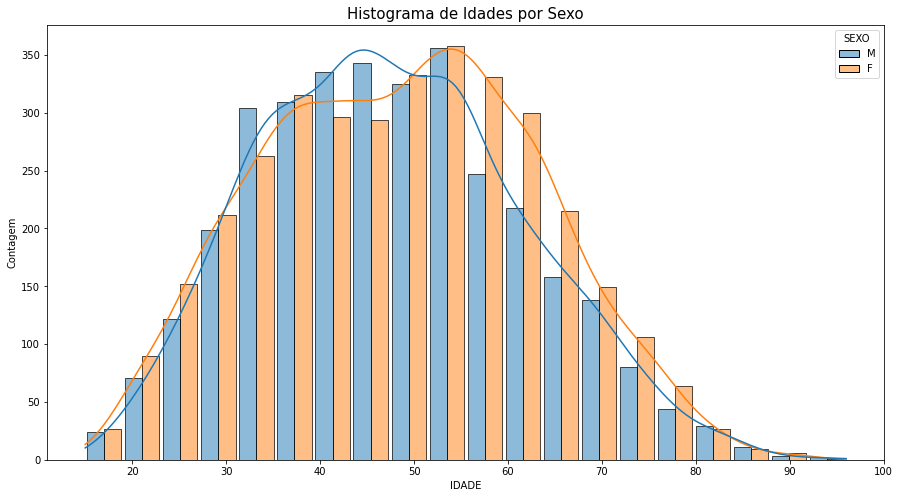

In [298]:
g1 = sns.histplot(x = 'IDADE', data = dados_tratado, hue = 'SEXO', kde = True, bins = 20, multiple="dodge", shrink=.9)
g1.figure.set_size_inches(15, 8)
plt.title('Histograma de Idades por Sexo', fontsize = 15)
plt.ylabel('Contagem')

Pelo menos pelo histograma não podemos atestar que há diferenças na distribuição de idades dos reclamantes por sexo.

Podemos explorar com mais detalhes estas diferenças com um boxplot, e assim temos:

Text(0, 0.5, 'Idade')

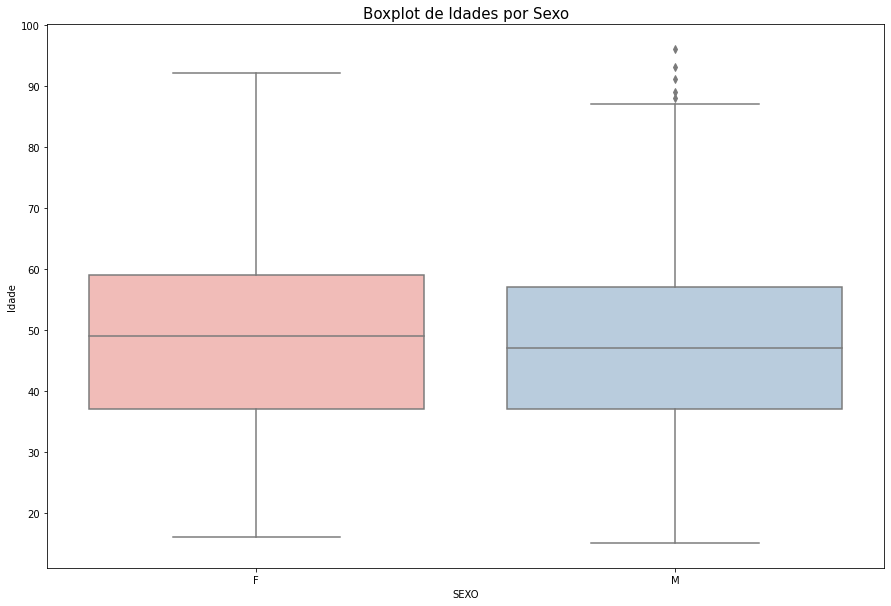

In [299]:
g2 = sns.boxplot(x= 'SEXO', y = 'IDADE', data = dados_tratado, palette="Pastel1", order=["F", "M"])
g2.figure.set_size_inches(15, 10)
plt.title('Boxplot de Idades por Sexo', fontsize = 15)
plt.ylabel('Idade')

Impressões:

- Os boxplots também indicam semelhança na distribuição de idades entre os sexos
- No entanto, há outliers para o grupo Masculino além de sua mediana e 3º quartil serem levemente menores que a do grupo Feminino.
- Na faixa entre 60-65 anos há uma uma concentração levemente maior de pessoas do sexo Feminino (verificável no histograma também) que fazem reclamações.

A prefeitura possui mais reclamantes de qual sexo?

Text(0, 0.5, ' ')

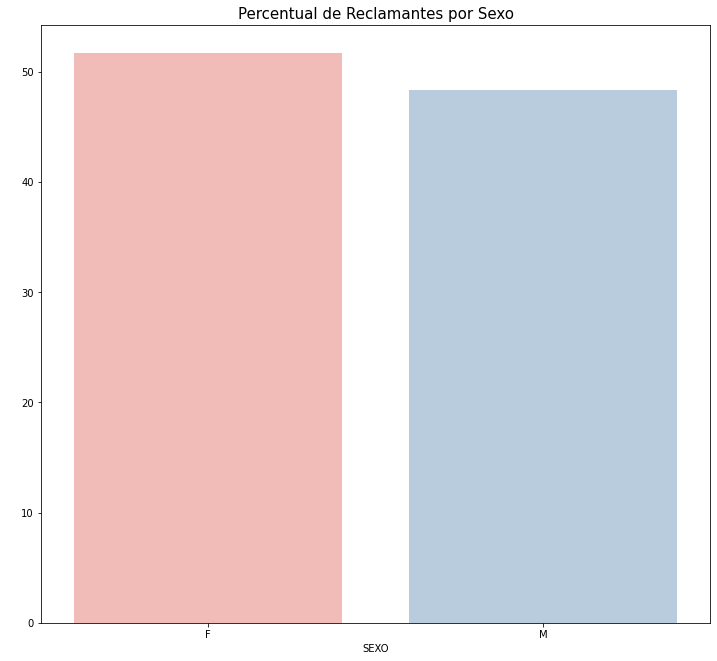

In [300]:
# Criando dados de interesse
qtde_sexo = pd.DataFrame(dados_tratado.groupby(['SEXO']).size()).reset_index()
qtde_sexo.rename(columns= {0 : 'Quantidade'}, inplace= True)
qtde_sexo['percentual'] = qtde_sexo['Quantidade'] / len(dados_tratado) * 100 # criando coluna de %

# Plotando visual

graf2_sexo = sns.barplot(x = 'SEXO', y = 'percentual', data=qtde_sexo, palette="Pastel1")
graf2_sexo.figure.set_size_inches(12, 11)
plt.title('Percentual de Reclamantes por Sexo', fontsize = 15)
plt.ylabel('Quantidade')
plt.ylabel(' ')

Agora iremos trabalhar com os assuntos das reclamações mais comuns de nossa base

In [301]:
# Quais os assuntos mais comuns que são tratados?

assunto_agrup = pd.DataFrame(dados_tratado.groupby(['ASSUNTO']).size().sort_values(ascending = False))
assunto_agrup = assunto_agrup.rename(columns = {0 : 'contagem'}).reset_index()
assunto_agrup

,ASSUNTO,contagem
0,COLETA,1632
1,ILUMINAÇÃO PÚBLICA,992
2,TRÂNSITO,867
3,ABORDAGEM SOCIAL DE RUA - ADULTO,321
4,POSTO DE SAÚDE,309
...,...,...
140,RODOVIÁRIA,1
141,S.A.V CRIANÇA - ORIENTAÇÃO TELEFÔNICA,1
142,SACOLÃO DA FAMÍLIA,1
143,PATRIMÔNIO PÚBLICO,1


Temos mais de 145 assuntos diferentes tratados pelos solicitantes. Iremos selecionar os mais comuns que, neste caso, possuem > 60 reclamações.

In [302]:
lista_assunto = list(assunto_agrup['ASSUNTO'].loc[assunto_agrup['contagem'] > 60])
lista_assunto

['COLETA',
 'ILUMINAÇÃO PÚBLICA',
 'TRÂNSITO',
 'ABORDAGEM SOCIAL DE RUA - ADULTO',
 'POSTO DE SAÚDE',
 'MOTORISTAS, COBRADORES E PORTEIROS',
 'DISQUE SOLIDARIEDADE',
 'POLUIÇÃO',
 'OUTROS SETORES SMS',
 'FISCALIZAÇÃO DE TERRENOS BALDIOS OU EDIFICADOS',
 'ANIMAIS',
 'ANIMAIS DOMÉSTICOS',
 'SEMÁFORO',
 'ÁRVORE',
 'FAUNA SINANTRÓPICA',
 'DRENAGEM',
 'UNIDADE DE PRONTO ATENDIMENTO',
 'LIMPEZA']

Agora iremos filtrar nosso dataset tratado apenas com esta lista de reclamações mais comuns com as funções `where` e `isin`

In [303]:
reclamacoes = dados_tratado.where(dados_tratado['ASSUNTO'].isin(lista_assunto))
reclamacoes.head(10)

,DATA,HORARIO,SUBDIVISAO,BAIRRO_ASS,SEXO,DATA_NASC,RESPOSTA_FINAL,ASSUNTO,HORA,IDADE
0,2016-09-12,01:28:16,DORMINDO/CAÍDAS NA RUA,centro,M,1997-04-06,A pessoa da solicitação já faz parte da rede d...,ABORDAGEM SOCIAL DE RUA - ADULTO,1.0,19.0
1,2016-12-11,02:29:24,DORMINDO/CAÍDAS NA RUA,centro,M,1971-12-29,A pessoa da solicitação já faz parte da rede d...,ABORDAGEM SOCIAL DE RUA - ADULTO,2.0,45.0
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2016-06-12,19:01:01,DORMINDO/CAÍDAS NA RUA,centro,M,1980-02-13,"EM ABORDAGEM REALIZADA, NÃO FOI ENCONTRADA A P...",ABORDAGEM SOCIAL DE RUA - ADULTO,19.0,36.0
5,2016-09-12,21:52:22,PESSOAS/FAMÍLIAS EM DESABRIGO NA RUA,reboucas,M,1978-06-20,Abordagem realizada. Pessoa foi encaminhada pa...,ABORDAGEM SOCIAL DE RUA - ADULTO,21.0,38.0
6,2016-06-12,23:46:39,PESSOAS/FAMÍLIAS EM DESABRIGO NA RUA,jardim botanico,M,1982-02-02,A pessoa da solicitação já faz parte da rede d...,ABORDAGEM SOCIAL DE RUA - ADULTO,23.0,34.0
7,2016-12-21,15:06:16,VEÍCULO ESTACIONADO - CARGA/DESCARGA,jardim botanico,M,1983-03-01,"Informamos que encaminhamos a viatura 524, che...",TRÂNSITO,15.0,33.0
8,2017-10-01,22:58:02,PESSOAS/FAMÍLIAS EM DESABRIGO NA RUA,jardim botanico,M,1986-03-29,01 - Abordagem realizada. Pessoa foi encaminha...,ABORDAGEM SOCIAL DE RUA - ADULTO,22.0,31.0
9,2017-01-21,07:14:40,PESSOAS/FAMÍLIAS EM DESABRIGO NA RUA,jardim botanico,F,1983-03-29,"EM ABORDAGEM REALIZADA, NÃO FOI ENCONTRADA A P...",ABORDAGEM SOCIAL DE RUA - ADULTO,7.0,34.0


Graficamente, quais as reclamações mais comuns?

Text(0, 0.5, ' ')

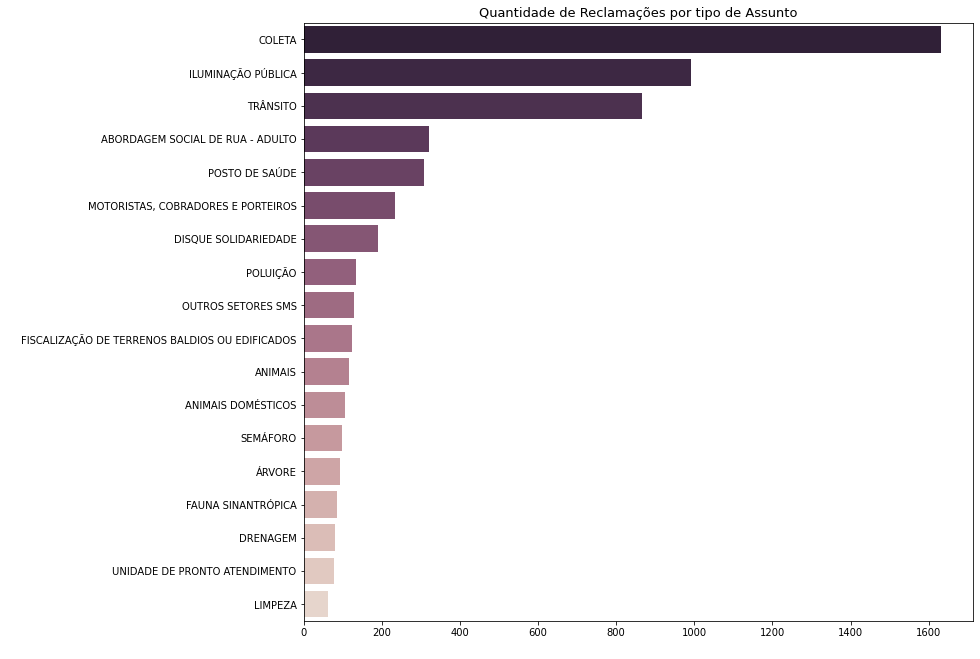

In [304]:
graf3_reclamacaoes = sns.countplot(y = 'ASSUNTO', data = reclamacoes, palette='ch:.1_r', order=reclamacoes['ASSUNTO'].value_counts().index)
graf3_reclamacaoes.figure.set_size_inches(12, 11)
plt.title('Quantidade de Reclamações por tipo de Assunto', fontsize = 13)
plt.xlabel(' ')
plt.ylabel(' ')

Com estes dados, podemos analisar também a similaridade das reclamações entre os bairros.

Para isto, usaremos o método `crosstab` para cruzar a quantidade de reclamações por Bairro x Assunto

In [305]:
bairros = pd.crosstab(reclamacoes['ASSUNTO'], reclamacoes['BAIRRO_ASS'])
bairros

BAIRRO_ASS,abranches,agua verde,ahu,alto boqueirao,alto da gloria,alto da rua xv,atuba,augusta,bacacheri,bairro alto,...,sitio cercado,taboao,taruma,tatuquara,tingui,uberaba,umbara,vila izabel,vista alegre,xaxim
ASSUNTO,,,,,,,,,,,,,,,,,,,,,
ABORDAGEM SOCIAL DE RUA - ADULTO,2,8,4,3,5,6,2,0,7,2,...,4,0,0,1,1,0,0,0,1,0
ANIMAIS,0,0,1,7,1,0,0,2,1,2,...,7,0,0,5,1,8,3,1,3,2
ANIMAIS DOMÉSTICOS,1,1,0,4,0,0,0,0,3,5,...,7,0,0,4,0,10,1,0,0,7
COLETA,15,41,17,31,4,13,7,4,34,86,...,60,1,28,19,13,47,5,7,26,47
DISQUE SOLIDARIEDADE,1,4,2,5,0,4,1,0,2,4,...,9,1,0,2,2,3,2,1,4,6
DRENAGEM,0,1,0,5,0,0,2,0,2,0,...,5,0,1,2,2,5,2,1,1,3
FAUNA SINANTRÓPICA,1,2,0,2,2,1,0,0,2,1,...,6,0,0,1,1,3,1,0,1,4
FISCALIZAÇÃO DE TERRENOS BALDIOS OU EDIFICADOS,1,13,1,2,0,2,1,1,0,0,...,7,0,0,3,0,9,2,0,2,4
ILUMINAÇÃO PÚBLICA,12,22,9,29,5,11,12,2,21,26,...,45,3,14,22,4,38,7,4,8,36


A saída acima saída nos mostra, por exemplo, que no bairro 'Abranches' tivemos 12 reclamações relativas a 'Iluminação Pública', e assim por diante.

Podemos então aplicar um teste de correlação entre os bairros onde quanto mais próximo de 1, maior a similaridade de reclamações por assunto entre um par de bairro.

In [306]:
correlacao = bairros.corr(method = 'pearson') # iremos utilizar o método de pearson para o cálculo
correlacao

BAIRRO_ASS,abranches,agua verde,ahu,alto boqueirao,alto da gloria,alto da rua xv,atuba,augusta,bacacheri,bairro alto,...,sitio cercado,taboao,taruma,tatuquara,tingui,uberaba,umbara,vila izabel,vista alegre,xaxim
BAIRRO_ASS,,,,,,,,,,,,,,,,,,,,,
abranches,1.000000,0.643055,0.884902,0.970722,0.123024,0.791709,0.794544,0.777465,0.874166,0.903948,...,0.963485,0.465605,0.907070,0.883269,0.844186,0.954435,0.678211,0.624121,0.854907,0.975221
agua verde,0.643055,1.000000,0.858102,0.623982,0.741225,0.872836,0.791846,0.457873,0.797828,0.637879,...,0.587818,0.204879,0.812256,0.517301,0.634941,0.653743,0.781724,0.907642,0.687336,0.670143
ahu,0.884902,0.858102,1.000000,0.848473,0.389906,0.914807,0.807990,0.714865,0.935760,0.886528,...,0.852842,0.358148,0.955636,0.693846,0.852803,0.870747,0.737892,0.818051,0.917330,0.860442
alto boqueirao,0.970722,0.623982,0.848473,1.000000,0.156873,0.759529,0.817464,0.774408,0.831386,0.854039,...,0.934172,0.446280,0.876565,0.902115,0.832988,0.952150,0.756346,0.648789,0.819032,0.972161
alto da gloria,0.123024,0.741225,0.389906,0.156873,1.000000,0.489287,0.515642,-0.098966,0.419315,0.067272,...,0.074968,-0.087167,0.303575,0.126778,0.150834,0.118885,0.521474,0.684358,0.111794,0.177159
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
uberaba,0.954435,0.653743,0.870747,0.952150,0.118885,0.750817,0.788739,0.832935,0.851041,0.888634,...,0.960357,0.433171,0.906221,0.890315,0.787015,1.000000,0.764711,0.654870,0.871909,0.942704
umbara,0.678211,0.781724,0.737892,0.756346,0.521474,0.736560,0.889417,0.585468,0.702908,0.542919,...,0.662525,0.440778,0.728206,0.703325,0.529311,0.764711,1.000000,0.829250,0.620305,0.720214
vila izabel,0.624121,0.907642,0.818051,0.648789,0.684358,0.774724,0.776734,0.439727,0.786965,0.633023,...,0.592859,0.257679,0.780455,0.545508,0.643710,0.654870,0.829250,1.000000,0.681306,0.690296


Esta matriz mostra a força de associação entre os dados.

Por exemplo, a correlação entre abranches e e ele mesmo é obviamente 1, indicando que que as reclamações por tipo de assunto são rigorosamente iguais entre si em todos os casos.

Se tivessemos o uma correlação 0, teriámos que para aquele par de bairro não existe nenhum assunto em comum.

Obs: para este caso específico uma correlação negativa não é possível de acontecer, pois o menor valor que pode-se assumir aqui é zero (caso explicado acima).

Evidentemente nossa matriz de correlação é muito grande, pois temos mais de 70 bairros sendo analisados. Isto dificulta a imediata leitura dos dados, e podemos usar um "mapa de calor", um gráfico do tipo `heatmap` para facilitar esta leitura.

Text(0.5, 1.0, 'Similaridade entre Bairros por Reclamações: correlações implícitas')

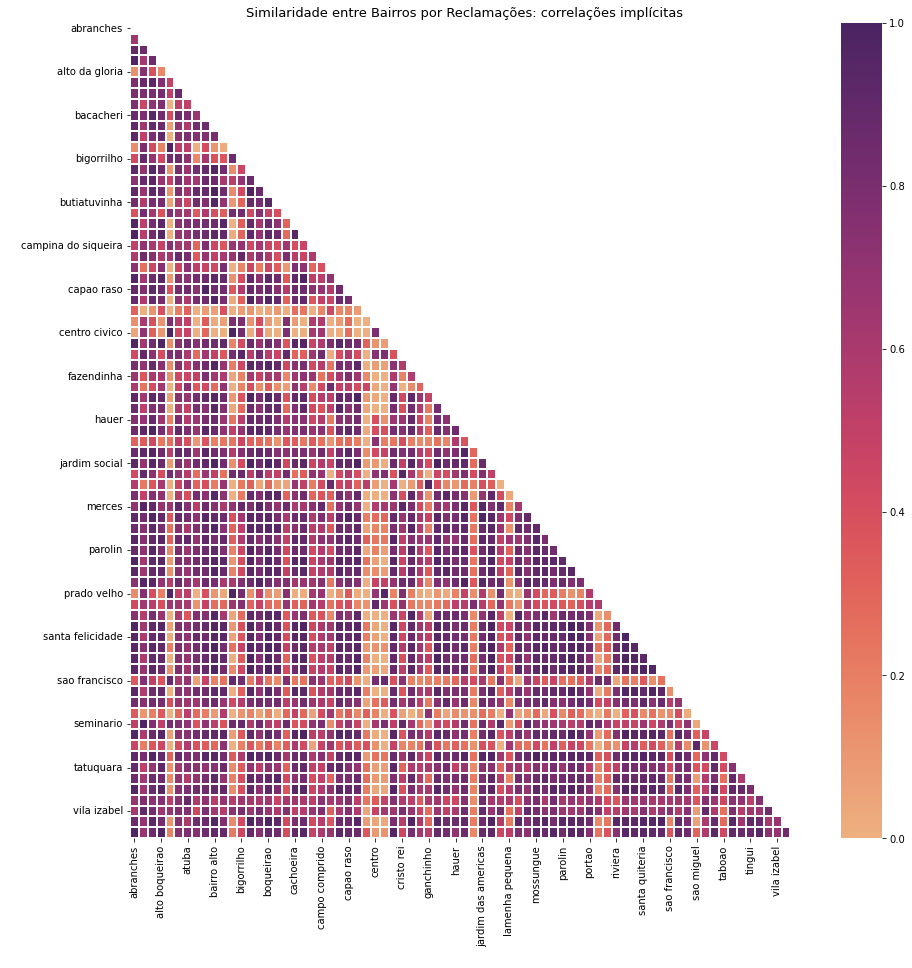

In [307]:
import numpy as np
cmap = sns.color_palette("flare", as_cmap=True) # definindo objeto para utilizar o parêmtro 'cmap' que altera esquema de cores
mask = np.triu(np.ones_like(correlacao, dtype=bool)) # criando objeto para passar no parâmetro 'mask' que elimina resultados duplicados de correlações
heatmap = sns.heatmap(data = correlacao, linewidths=0.05, vmin=0, vmax=1, cmap = cmap, mask = mask)
heatmap.figure.set_size_inches(15, 15)
plt.xlabel(' ')
plt.ylabel(' ')
plt.title('Similaridade entre Bairros por Reclamações: correlações implícitas', fontsize = 13)

No gráfico acima podemos ver os mesmos resultados da matriz de correlação, mas agora por intensidade das cores. Os pontos mais escuros mostram maior correlação entre os assuntos por bairro, ou seja, maior similaridade entre suas demandas, ao passo que os pontos mais claros indicam o oposto!

Iremos agora trabalhar os bairros com maior quantidade de reclamações

In [317]:
# Aqui já convertemos o groupby em um dataframe para facilitar as plotagens adiante
reclamacao_bairro = pd.DataFrame(dados_tratado.groupby(['BAIRRO_ASS']).size().sort_values(ascending = False))
reclamacao_bairro.rename(columns = {0 : 'QTDE_RECLAMACOES', 'BAIRRO_ASS' : 'Bairro'}, inplace = True)
reclamacao_bairro.reset_index()

,BAIRRO_ASS,QTDE_RECLAMACOES
0,cidade industrial,406
1,centro,404
2,cajuru,310
3,sitio cercado,252
4,boqueirao,243
...,...,...
70,cascatinha,9
71,caximba,4
72,sao miguel,3
73,riviera,1


Agora sabemos que o bairro mais problemático é Cidade Industrial, ao passo que Lamenha Pequena e Riviera figuram com menor quantidade de reclamações.

Graficamente, temos:

Text(0.5, 1.0, 'Quantidade de Reclamações por Bairro (Números Absolutos)')

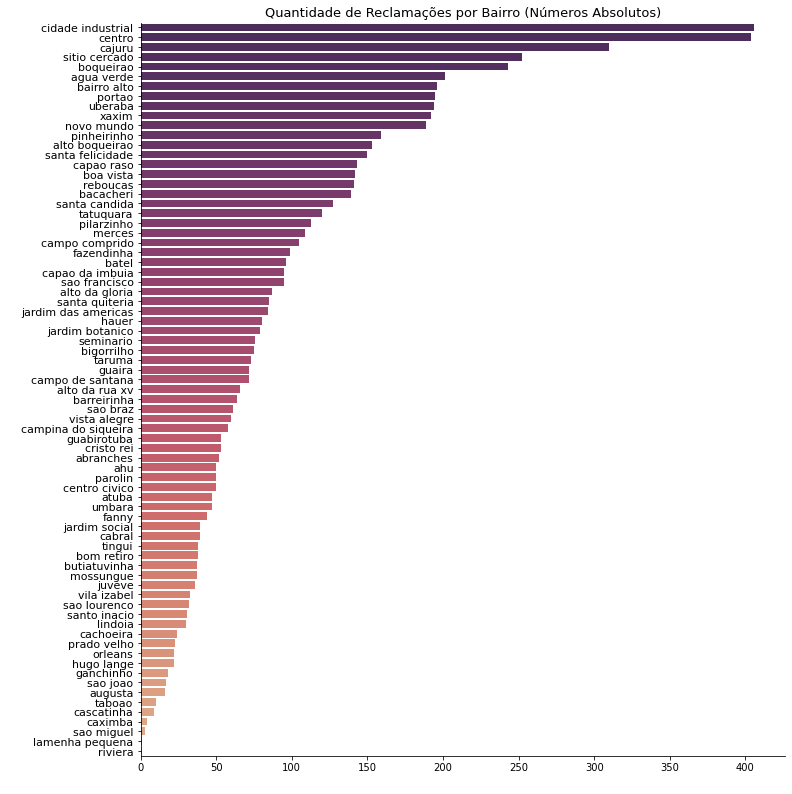

In [318]:
g1_bairros = sns.catplot(y="BAIRRO_ASS", kind="count", palette = 'flare_r', data=dados_tratado, order = dados_tratado['BAIRRO_ASS'].value_counts().index)
g1_bairros.figure.set_size_inches(15, 12)
plt.yticks(fontsize = 11)
plt.ylabel(' ')
plt.xlabel(' ')
plt.title('Quantidade de Reclamações por Bairro (Números Absolutos)', fontsize = 13)

Podemos verificar também a quantidade de reclamações totais ao longo dos meses. 

Entretanto, iremos reutilizar o dataset original, sem o tratamento de NaN's, já que para este objetivo não desejamos perda de informação.

In [319]:
# Criando coluna mes no dataset original
dados['MES'] = dados['DATA'].dt.month
dados.head()

,DATA,HORARIO,SUBDIVISAO,BAIRRO_ASS,SEXO,DATA_NASC,RESPOSTA_FINAL,ASSUNTO,HORA,IDADE,mes,MES
4,2016-09-12,01:28:16,DORMINDO/CAÍDAS NA RUA,centro,M,1997-04-06,A pessoa da solicitação já faz parte da rede d...,ABORDAGEM SOCIAL DE RUA - ADULTO,1,19,9,9
5,2016-12-11,02:29:24,DORMINDO/CAÍDAS NA RUA,centro,M,1971-12-29,A pessoa da solicitação já faz parte da rede d...,ABORDAGEM SOCIAL DE RUA - ADULTO,2,45,12,12
7,2017-11-01,12:11:12,RECURSOS MATERIAIS - MEDICAMENTOS,sao francisco,F,1957-04-08,Alendronato de sódio 70 mg e Carbonato de cálc...,CRM-AF/SMS,12,60,11,11
8,2016-12-14,10:19:29,RECURSOS MATERIAIS - MEDICAMENTOS,sao francisco,F,1938-08-18,ALENDRONATO DE SÓDIO 70 MG E CARBONATO DE CÁL...,CRM-AF/SMS,10,78,12,12
9,2016-06-12,19:01:01,DORMINDO/CAÍDAS NA RUA,centro,M,1980-02-13,"EM ABORDAGEM REALIZADA, NÃO FOI ENCONTRADA A P...",ABORDAGEM SOCIAL DE RUA - ADULTO,19,36,6,6


In [320]:
# Calculando quantidade de reclamações por mês e gerando novo dataset para o gráfico
reclamacoes_mes = pd.DataFrame(dados.groupby(['MES']).size())
reclamacoes_mes.rename(columns={0 : 'QTDE_RECLAMACOES'}, inplace=True)
reclamacoes_mes

,QTDE_RECLAMACOES
MES,
1,1071
2,203
3,244
4,242
5,339
6,262
7,338
8,283
9,328


Agora podemos plotar nossa linha de tendência

Text(0.5, 0, 'Mês')

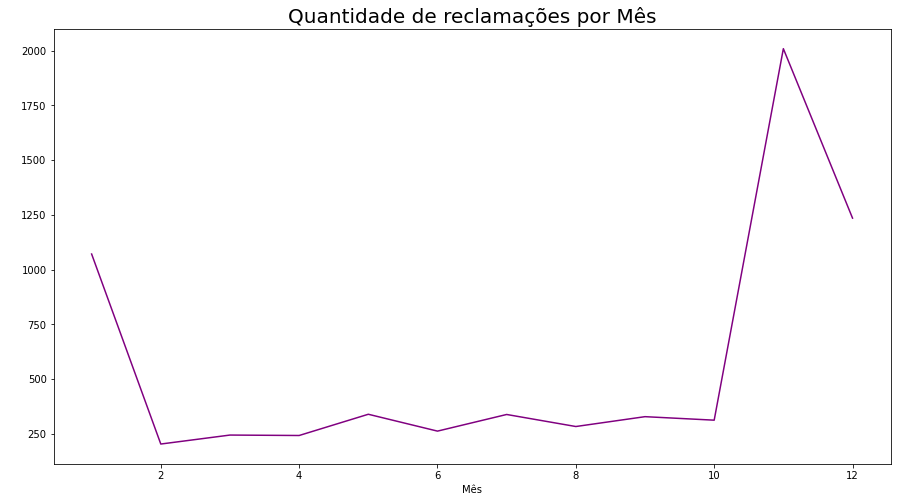

In [324]:
g3_reclamacoes = sns.lineplot(x = 'MES', y ='QTDE_RECLAMACOES', data = reclamacoes_mes, color = 'purple')
g3_reclamacoes.figure.set_size_inches(15, 8)
plt.title('Quantidade de reclamações por Mês', fontsize = 20)
plt.ylabel(' ')
plt.xlabel('Mês')

## Impressões Finais

- O último trismestre acumula maior número de reclamações;
- Cidade Industrial, Centro, Cajuru são bairros que necessitam de maior atenção por parte da prefeitura;
- Coleta de Lixo, Iluminação Pública e Trânsito figuram como as reclamações mais frequentes e merecem mais atenção do poder público de curitiba;
- Em geral, as reclamações são feitas, em sua maior parte, por cidadãos entre 50-60 anos;
- Há mais reclamações registradas por mulheres (~ 51%) do que homens ( ~ 48%)